### Figure 3 supplementary

In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.extend(['/home/nkinsky/Documents/GitHub/NeuroPy'])
sys.path.extend(['/home/nkinsky/Documents/GitHubPrivate/pythonprogs/DataPaths/'])
    

import matplotlib.pyplot as plt
import numpy as np
import subjects
import pandas as pd
import seaborn as sns
from neuropy import plotting
from scipy import stats
from plotters import Plotter, get_nsd_vs_sd_df
from stats_utils import get_bootstrap_prob, get_bootstrap_prob_paired

grpdata = subjects.GroupData()

### (1h block) Ripple frequency

In [ ]:
rpl_prop = grpdata.ripple_1h_blocks_bootstrap_session_ripples
rpl_prop_sess = grpdata.ripple_features_1h_blocks
rpl_sess_mean = (
    rpl_prop_sess.groupby(["grp", "zt", "session"], sort=False)
    .mean(numeric_only=True)
    .reset_index()
)

fig = subjects.SdFig().fig1_supp(8, 8)
y_labels = [
    "Ripple frequency (Hz)",
    "Sharp wave amplitude",
    "Ripple power (zscore)",
]
colors = subjects.colors_sd(1)
colors_light = subjects.colors_sd_light(1)
ylims = [[145, 185], [2, 8], [3, 8]]
for d, param in enumerate(["peak_freq"]):
    fig_row = 3 * d + 1
    subfig = fig.add_subfigure(fig.gs[fig_row : fig_row + 1, :4])
    axs = subfig.subplots(1, 3, sharey=True, width_ratios=[1.5, 1.5, 1.2])
    for g, grp in enumerate(["NSD", "SD"]):
        mean_df = rpl_sess_mean[rpl_sess_mean.grp == grp]
        param_df = rpl_prop[rpl_prop.grp == grp]

        ax = axs[g]

        p1 = Plotter(data=param_df, x="zt", y=param, ax=ax)
        p1.boxplot_sd2(palette=[colors[g]], zorder=3).stat_anot(
            stat_within=get_bootstrap_prob_paired, alpha_within=0.025, fontsize=5
        )

        p2 = Plotter(data=mean_df, x="zt", y=param, ax=ax)
        p2.striplineplot_sd(palette=[colors_light[g]])

        ax.legend("", frameon=False)
        ax.set_xlabel("")
        if g == 0:
            ax.set_ylabel(y_labels[d])
        else:
            ax.set_ylabel("")

    # ax = axs[2]
    # df = get_nsd_vs_sd_df(rpl_prop)
    # df2 = get_nsd_vs_sd_df(rpl_sess_mean)

    # p1 = Plotter(data=df, x="zt", y=param, hue="grp", hue_order=["NSD", "SD"], ax=ax)
    # p1.boxplot_sd2(palette=colors, zorder=3).stat_anot_sd(
    #     stat_across=get_bootstrap_prob,
    #     alpha_across=0.025,
    #     fontsize=5,
    # )
    # p2 = Plotter(data=df2, x="zt", y=param, hue="grp", hue_order=["NSD", "SD"], ax=ax)
    # p2.striplineplot_sd(palette=colors_light)

    # ax.set_ylabel("")
    # ax.set_ylim(*ylims[d])

fig.savefig(subjects.figpath_sd / "ripple_1h_properties", format="svg")

### (1h block) Firing rates

In [ ]:
fig = subjects.SdFig().fig_supp()

palette = subjects.colors_sd(1)
palette_light = subjects.colors_sd_light(1)

frate_df = grpdata.frate_1h_blocks_bootstrap
frate_df_sess = grpdata.frate_1h_blocks
frate_sess_mean = (
    frate_df_sess.groupby(["grp", "zt", "session", "neuron_type"], sort=False)
    .mean(numeric_only=True)
    .reset_index()
)

for i, ntype in enumerate(["pyr", "inter"]):
    ntype_df = frate_df[frate_df.neuron_type == ntype]
    ntype_mean_df = frate_sess_mean[frate_sess_mean.neuron_type == ntype]
    # ylims = (0.2, 2) if ntype == "pyr" else (5, 35)
    fig_row = 2 * i + 1
    subfig = fig.add_subfigure(fig.gs[fig_row, :4])
    axs = subfig.subplots(1, 3, sharey=True, width_ratios=[1.5, 1.5, 1.2])

    for g, grp in enumerate(["NSD", "SD"]):
        # ax = fig.subplot(gs_[i, g])
        ax = axs[g]
        p1 = Plotter(data=ntype_df[ntype_df.grp == grp], x="zt", y="frate", ax=ax)
        p1.boxplot_sd2(palette=[palette[g]], zorder=3).stat_anot(
            stat_within=get_bootstrap_prob_paired, alpha_within=0.025, fontsize=5
        )

        p2 = Plotter(
            data=ntype_mean_df[ntype_mean_df.grp == grp], x="zt", y="frate", ax=ax
        )
        p2.striplineplot_sd(palette=[palette_light[g]])

        # ax.set_ylim(*ylims)

    # ax = axs[2]
    # df = get_nsd_vs_sd_df(ntype_df)
    # df2 = get_nsd_vs_sd_df(ntype_mean_df)
    # p1 = Plotter(data=df, x="zt", y="frate", hue="grp", ax=ax)
    # p1.boxplot_sd2(palette=palette, zorder=3).stat_anot_sd(
    #     stat_across=get_bootstrap_prob,
    #     alpha_across=0.025,
    #     fontsize=5,
    # )

    # p2 = Plotter(data=df2, x="zt", y="frate", hue="grp", hue_order=["NSD", "SD"], ax=ax)
    # p2.striplineplot_sd(palette=palette_light)

    # ax.set_ylim(*ylims)

fig.savefig(subjects.figpath_sd / "frate_1h_blocks", format="svg")

### (1h block) Explained variance

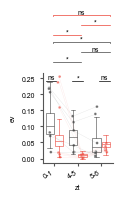

In [22]:
fig = subjects.SdFig().fig_supp()
ax = fig.subplot(fig.gs[:1, 4])
boot_df = grpdata.ev_1h_blocks_bootstrap
ev_df = grpdata.ev_1h_blocks

palette = subjects.colors_sd(1)
p1 = Plotter(data=boot_df, x="zt", y="ev", hue="grp", hue_order=["NSD", "SD"], ax=ax)
p1.boxplot_sd2(palette=palette, zorder=3).stat_anot_sd(
    stat_within=get_bootstrap_prob_paired,
    stat_across=get_bootstrap_prob,
    alpha_across=0.025,
    alpha_within=0.025,
    fontsize=5,
)

palette_light = subjects.colors_sd_light(1)
p2 = Plotter(data=ev_df, x="zt", y="ev", hue="grp", hue_order=["NSD", "SD"])
p2.striplineplot_sd(palette=palette_light)

# fig.savefig(subjects.figpath_sd / "ev_1h_blocks", format="svg")

### Delta rate vs EV in blocks

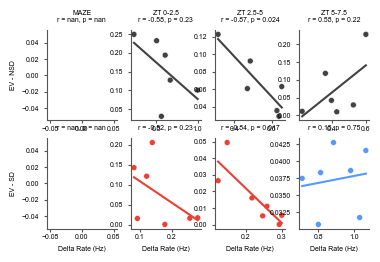

In [31]:
fig = subjects.SdFig().fig_supp()
# ax = fig.subplot(fig.gs[:1, 4])
palette = subjects.colors_sd(1)
rs_color = subjects.colors_rs(1)[0]

include_maze = True
epochs_to_plot = ["MAZE", "ZT 0-2.5", "ZT 2.5-5", "ZT 5-7.5"] if include_maze else ["ZT 0-2.5", "ZT 2.5-5", "ZT 5-7.5"]
line_alpha = 0.5
palette_line = subjects.colors_sd(line_alpha)
rs_color_line = subjects.colors_rs(line_alpha)[0]

ev_df = grpdata.ev_in_chunks if not include_maze else grpdata.ev_in_chunks_wmaze
delta_df = grpdata.delta_wave_rate_w_name if not include_maze else grpdata.delta_wave_rate_w_name_wmaze
delta_df = delta_df[delta_df.zt != "PRE"]
delta_df = delta_df.reset_index().drop(columns="index")
dbool = np.array([dname in ev_df.name.unique() for dname in delta_df.name])  # Grab only sessions in EV dataframe
delta_df = delta_df[dbool]
comb_df = delta_df.merge(ev_df, on=("name", "grp", "zt"))  # merge ev and delta values
for idg, grp in enumerate(["NSD", "SD"]):
    for idz, zt in enumerate(epochs_to_plot):
        df_use = comb_df[(comb_df.zt == zt) & (comb_df.grp == grp)]
        ax = fig.subplot(fig.gs[idg, idz])
        # color_use = palette[idg]
        color_use = rs_color if (grp == "SD") & (zt == "ZT 5-7.5") else palette[idg]
            
        sns.scatterplot(data=df_use, x="delta_rate", y="ev", size=2, facecolor=color_use, legend=False)
        if idg == 1:
            ax.set_xlabel("Delta Rate (Hz)")
        else:
            ax.set_xlabel("")
        if idz == 0:
            ax.set_ylabel(f"EV - {grp}")
        else:
            ax.set_ylabel("")

        # Calculate and plot regression line
        line_color = rs_color_line if (grp == "SD") & (zt == "ZT 5-7.5") else palette_line[idg]
        linstats = stats.linregress(df_use.delta_rate.values, df_use.ev.values)
        xlims = np.array([df_use.delta_rate.min(), df_use.delta_rate.max()])
        yline = linstats.intercept + linstats.slope * xlims
        ax.plot(xlims, yline, color=color_use)

        if idg == 0:
            ax.set_title(f"{zt}\nr = {linstats.rvalue:0.2g}, p = {linstats.pvalue:0.2g}")
        else:
            ax.set_title(f"r = {linstats.rvalue:0.2g}, p = {linstats.pvalue:0.2g}")

maze_append = "_wmaze" if include_maze else ""
fig.savefig(subjects.figpath_sd / f"ev_vs_delta_blocks{maze_append}", format="svg")

### Delta rate ("sleepiness") in future epochs vs ev in previous epoch
"Does future sleepiness predict EV?"

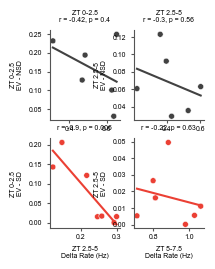

In [76]:
# Plot EV vs. delta in previous block
fig = subjects.SdFig().fig_supp()
# ax = fig.subplot(fig.gs[:1, 4])
palette = subjects.colors_sd(1)
rs_color = subjects.colors_rs(1)[0]

line_alpha = 0.5
palette_line = subjects.colors_sd(line_alpha)
rs_color_line = subjects.colors_rs(line_alpha)[0]

ev_df = grpdata.ev_in_chunks
delta_df = grpdata.delta_wave_rate_w_name
delta_df = delta_df[delta_df.zt != "PRE"]
delta_df = delta_df.reset_index().drop(columns="index")
dbool = np.array([dname in ev_df.name.unique() for dname in delta_df.name])  # Grab only sessions in EV dataframe
delta_df = delta_df[dbool]
comb_df = delta_df.merge(ev_df, on=("name", "grp", "zt"))  # merge ev and delta values
for idg, grp in enumerate(["NSD", "SD"]):
    for idz, (zt, zt1) in enumerate(zip(["ZT 0-2.5", "ZT 2.5-5"], ["ZT 2.5-5", "ZT 5-7.5"])):
        delta_df_use = delta_df[(delta_df.zt == zt1) & (delta_df.grp == grp)]
        ev_df_use = ev_df[(ev_df.zt == zt) & (ev_df.grp == grp)]
        df_use = delta_df_use.drop(columns="zt").merge(ev_df_use.drop(columns="zt"), on=("name", "grp"))
        ax = fig.subplot(fig.gs[idg, idz])
        # color_use = palette[idg]
        color_use = rs_color if (grp == "SD") & (zt == "ZT 5-7.5") else palette[idg]
            
        sns.scatterplot(data=df_use, x="delta_rate", y="ev", size=2, facecolor=color_use, legend=False)
        if idg == 1:
            ax.set_xlabel(f"{zt1}\nDelta Rate (Hz)")
        else:
            ax.set_xlabel("")
        # if idz == 0:
        ax.set_ylabel(f"{zt}\nEV - {grp}")
        # else:
        #     ax.set_ylabel("")

        # Calculate and plot regression line
        line_color = rs_color_line if (grp == "SD") & (zt == "ZT 5-7.5") else palette_line[idg]
        linstats = stats.linregress(df_use.delta_rate.values, df_use.ev.values)
        xlims = np.array([df_use.delta_rate.min(), df_use.delta_rate.max()])
        yline = linstats.intercept + linstats.slope * xlims
        ax.plot(xlims, yline, color=color_use)

        if idg == 0:
            ax.set_title(f"{zt}\nr = {linstats.rvalue:0.2g}, p = {linstats.pvalue:0.2g}")
        else:
            ax.set_title(f"r = {linstats.rvalue:0.2g}, p = {linstats.pvalue:0.2g}")

fig.savefig(subjects.figpath_sd / "ev_vs_delta_next_epoch_blocks", format="svg")

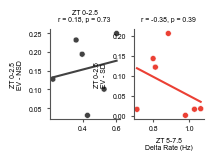

In [77]:
# Plot EV from SD1/NS1 vs delta from RS/NS3
fig = subjects.SdFig().fig_supp()
# ax = fig.subplot(fig.gs[:1, 4])
palette = subjects.colors_sd(1)
rs_color = subjects.colors_rs(1)[0]

line_alpha = 0.5
palette_line = subjects.colors_sd(line_alpha)
rs_color_line = subjects.colors_rs(line_alpha)[0]

ev_df = grpdata.ev_in_chunks
delta_df = grpdata.delta_wave_rate_w_name
delta_df = delta_df[delta_df.zt != "PRE"]
delta_df = delta_df.reset_index().drop(columns="index")
dbool = np.array([dname in ev_df.name.unique() for dname in delta_df.name])  # Grab only sessions in EV dataframe
delta_df = delta_df[dbool]
comb_df = delta_df.merge(ev_df, on=("name", "grp", "zt"))  # merge ev and delta values
for idg, grp in enumerate(["NSD", "SD"]):
    for idz, (zt, zt1) in enumerate(zip(["ZT 0-2.5"], ["ZT 5-7.5"])):
        delta_df_use = delta_df[(delta_df.zt == zt1) & (delta_df.grp == grp)]
        ev_df_use = ev_df[(ev_df.zt == zt) & (ev_df.grp == grp)]
        df_use = delta_df_use.drop(columns="zt").merge(ev_df_use.drop(columns="zt"), on=("name", "grp"))
        ax = fig.subplot(fig.gs[idz, idg])
        # color_use = palette[idg]
        color_use = rs_color if (grp == "SD") & (zt == "ZT 5-7.5") else palette[idg]
            
        sns.scatterplot(data=df_use, x="delta_rate", y="ev", size=2, facecolor=color_use, legend=False)
        if idg == 1:
            ax.set_xlabel(f"{zt1}\nDelta Rate (Hz)")
        else:
            ax.set_xlabel("")
        # if idz == 0:
        ax.set_ylabel(f"{zt}\nEV - {grp}")
        # else:
        #     ax.set_ylabel("")

        # Calculate and plot regression line
        line_color = rs_color_line if (grp == "SD") & (zt == "ZT 5-7.5") else palette_line[idg]
        linstats = stats.linregress(df_use.delta_rate.values, df_use.ev.values)
        xlims = np.array([df_use.delta_rate.min(), df_use.delta_rate.max()])
        yline = linstats.intercept + linstats.slope * xlims
        ax.plot(xlims, yline, color=color_use)

        if idg == 0:
            ax.set_title(f"{zt}\nr = {linstats.rvalue:0.2g}, p = {linstats.pvalue:0.2g}")
        else:
            ax.set_title(f"r = {linstats.rvalue:0.2g}, p = {linstats.pvalue:0.2g}")

fig.savefig(subjects.figpath_sd / "ev_block1_vs_delta_block3", format="svg")

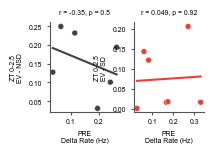

In [10]:
# Plot EV from SD1/NS1 vs delta from RS/NS3
fig = subjects.SdFig().fig_supp()
# ax = fig.subplot(fig.gs[:1, 4])
palette = subjects.colors_sd(1)
rs_color = subjects.colors_rs(1)[0]

line_alpha = 0.5
palette_line = subjects.colors_sd(line_alpha)
rs_color_line = subjects.colors_rs(line_alpha)[0]

ev_df = grpdata.ev_in_chunks
delta_df = grpdata.delta_wave_rate_w_name
# delta_df = delta_df[delta_df.zt != "PRE"]
delta_df = delta_df.reset_index().drop(columns="index")
dbool = np.array([dname in ev_df.name.unique() for dname in delta_df.name])  # Grab only sessions in EV dataframe
delta_df = delta_df[dbool]
comb_df = delta_df.merge(ev_df, on=("name", "grp", "zt"))  # merge ev and delta values
for idg, grp in enumerate(["NSD", "SD"]):
    for idz, (zt, zt1) in enumerate(zip(["ZT 0-2.5"], ["PRE"])):
        delta_df_use = delta_df[(delta_df.zt == zt1) & (delta_df.grp == grp)]
        ev_df_use = ev_df[(ev_df.zt == zt) & (ev_df.grp == grp)]
        df_use = delta_df_use.drop(columns="zt").merge(ev_df_use.drop(columns="zt"), on=("name", "grp"))
        ax = fig.subplot(fig.gs[idz, idg])
        # color_use = palette[idg]
        color_use = rs_color if (grp == "SD") & (zt == "ZT 5-7.5") else palette[idg]
            
        sns.scatterplot(data=df_use, x="delta_rate", y="ev", size=2, facecolor=color_use, legend=False)
        ax.set_xlabel(f"{zt1}\nDelta Rate (Hz)")
        # if idz == 0:
        ax.set_ylabel(f"{zt}\nEV - {grp}")
        # else:
        #     ax.set_ylabel("")

        # Calculate and plot regression line
        line_color = rs_color_line if (grp == "SD") & (zt == "ZT 5-7.5") else palette_line[idg]
        linstats = stats.linregress(df_use.delta_rate.values, df_use.ev.values)
        xlims = np.array([df_use.delta_rate.min(), df_use.delta_rate.max()])
        yline = linstats.intercept + linstats.slope * xlims
        ax.plot(xlims, yline, color=color_use)

        ax.set_title(f"r = {linstats.rvalue:0.2g}, p = {linstats.pvalue:0.2g}")

fig.savefig(subjects.figpath_sd / "ev_block1_vs_delta_pre", format="svg")

### Delta MAZE vs NS1/SD1 EV

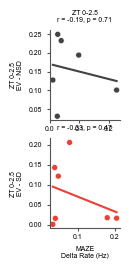

In [33]:
# Plot EV vs. delta in previous block
fig = subjects.SdFig().fig_supp()
# ax = fig.subplot(fig.gs[:1, 4])
palette = subjects.colors_sd(1)
rs_color = subjects.colors_rs(1)[0]

line_alpha = 0.5
palette_line = subjects.colors_sd(line_alpha)
rs_color_line = subjects.colors_rs(line_alpha)[0]

ev_df = grpdata.ev_in_chunks_wmaze
delta_df = grpdata.delta_wave_rate_w_name_wmaze
delta_df = delta_df[delta_df.zt != "PRE"]
delta_df = delta_df.reset_index().drop(columns="index")
dbool = np.array([dname in ev_df.name.unique() for dname in delta_df.name])  # Grab only sessions in EV dataframe
delta_df = delta_df[dbool]
comb_df = delta_df.merge(ev_df, on=("name", "grp", "zt"))  # merge ev and delta values
for idg, grp in enumerate(["NSD", "SD"]):
    for idz, (zt, zt1) in enumerate(zip(["ZT 0-2.5"], ["MAZE"])):
        delta_df_use = delta_df[(delta_df.zt == zt1) & (delta_df.grp == grp)]
        ev_df_use = ev_df[(ev_df.zt == zt) & (ev_df.grp == grp)]
        df_use = delta_df_use.drop(columns="zt").merge(ev_df_use.drop(columns="zt"), on=("name", "grp"))
        ax = fig.subplot(fig.gs[idg, idz])
        # color_use = palette[idg]
        color_use = rs_color if (grp == "SD") & (zt == "ZT 5-7.5") else palette[idg]
            
        sns.scatterplot(data=df_use, x="delta_rate", y="ev", size=2, facecolor=color_use, legend=False)
        if idg == 1:
            ax.set_xlabel(f"{zt1}\nDelta Rate (Hz)")
        else:
            ax.set_xlabel("")
        # if idz == 0:
        ax.set_ylabel(f"{zt}\nEV - {grp}")
        # else:
        #     ax.set_ylabel("")

        # Calculate and plot regression line
        line_color = rs_color_line if (grp == "SD") & (zt == "ZT 5-7.5") else palette_line[idg]
        linstats = stats.linregress(df_use.delta_rate.values, df_use.ev.values)
        xlims = np.array([df_use.delta_rate.min(), df_use.delta_rate.max()])
        yline = linstats.intercept + linstats.slope * xlims
        ax.plot(xlims, yline, color=color_use)

        if idg == 0:
            ax.set_title(f"{zt}\nr = {linstats.rvalue:0.2g}, p = {linstats.pvalue:0.2g}")
        else:
            ax.set_title(f"r = {linstats.rvalue:0.2g}, p = {linstats.pvalue:0.2g}")

fig.savefig(subjects.figpath_sd / "ev1_vs_delta_maze", format="svg")

### SWR rate on maze vs EV
"Does hippocampal SWR engagement during novel track exposure predict later reactivation of that track"
One could potentially do the same analysis for theta sequences...

In [78]:
rpl_df = grpdata.ripple_rate
delta_df = grpdata.delta_wave_rate_w_name
rpl_df

,rate,zt,session,name,grp
0,0.407778,PRE,0,RatJDay2,NSD
1,0.346875,MAZE,0,RatJDay2,NSD
2,0.661333,ZT 0-2.5,0,RatJDay2,NSD
3,0.453333,ZT 2.5-5,0,RatJDay2,NSD
4,0.507778,ZT 5-7.5,0,RatJDay2,NSD
...,...,...,...,...,...
75,0.537333,PRE,15,RatVDay2,SD
76,0.176508,MAZE,15,RatVDay2,SD
77,0.532778,ZT 0-2.5,15,RatVDay2,SD
78,0.586444,ZT 2.5-5,15,RatVDay2,SD


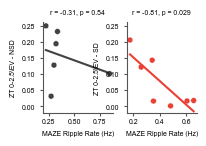

In [85]:
fig = subjects.SdFig().fig_supp()
# ax = fig.subplot(fig.gs[:1, 4])
palette = subjects.colors_sd(1)
rs_color = subjects.colors_rs(1)[0]
match_ylims = [-0.02, 0.26]

line_alpha = 0.5
palette_line = subjects.colors_sd(line_alpha)
rs_color_line = subjects.colors_rs(line_alpha)[0]

ev_df = grpdata.ev_in_chunks
ev_df = ev_df[ev_df.zt == "ZT 0-2.5"]
rpl_df = grpdata.ripple_rate
rpl_df = rpl_df[rpl_df.zt == "MAZE"]
rbool = np.array([rname in ev_df.name.unique() for rname in rpl_df.name])  # Grab only sessions in EV dataframe
rpl_df = rpl_df[rbool]
comb_df = rpl_df.merge(ev_df, on=("name", "grp"))  # merge ev and ripple values
for idg, grp in enumerate(["NSD", "SD"]):
    df_use = comb_df[comb_df.grp == grp]
    ax = fig.subplot(fig.gs[0, idg])
    # color_use = palette[idg]
    color_use = palette[idg]
        
    sns.scatterplot(data=df_use, x="rate", y="ev", size=2, facecolor=color_use, legend=False)
    ax.set_xlabel("MAZE Ripple Rate (Hz)")
    if idz == 0:
        ax.set_ylabel(f"ZT 0-2.5\EV - {grp}")

    # Calculate and plot regression line
    line_color = rs_color_line if (grp == "SD") & (zt == "ZT 5-7.5") else palette_line[idg]
    linstats = stats.linregress(df_use.rate.values, df_use.ev.values)
    xlims = np.array([df_use.rate.min(), df_use.rate.max()])
    yline = linstats.intercept + linstats.slope * xlims
    ax.plot(xlims, yline, color=color_use)

    ax.set_title(f"r = {linstats.rvalue:0.2g}, p = {linstats.pvalue:0.2g}")
    ax.set_ylim(match_ylims)
    

fig.savefig(subjects.figpath_sd / "ev_vs_maze_ripple_rate", format="svg")

### Ripple Number on MAZE vs EV in ZT 0-2.5 block

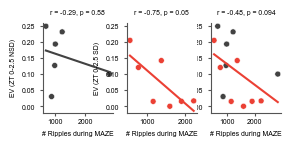

In [39]:
fig = subjects.SdFig().fig_supp()
# ax = fig.subplot(fig.gs[:1, 4])
palette = subjects.colors_sd(1)
rs_color = subjects.colors_rs(1)[0]
match_ylims = [-0.02, 0.26]

line_alpha = 0.5
palette_line = subjects.colors_sd(line_alpha)
rs_color_line = subjects.colors_rs(line_alpha)[0]

ev_df = grpdata.ev_in_chunks
ev_df = ev_df[ev_df.zt == "ZT 0-2.5"]
rpl_df = grpdata.ripple_number
rpl_df = rpl_df[rpl_df.zt == "MAZE"]
rbool = np.array([rname in ev_df.name.unique() for rname in rpl_df.name])  # Grab only sessions in EV dataframe
rpl_df = rpl_df[rbool]
comb_df = rpl_df.merge(ev_df, on=("name", "grp"))  # merge ev and ripple values

axcomb = fig.subplot(fig.gs[0, 2])
for idg, grp in enumerate(["NSD", "SD"]):
    df_use = comb_df[comb_df.grp == grp]
    ax = fig.subplot(fig.gs[0, idg])
    # color_use = palette[idg]
    color_use = palette[idg]
        
    sns.scatterplot(data=df_use, x="number", y="ev", size=2, facecolor=color_use, legend=False, ax=ax)
    sns.scatterplot(data=df_use, x="number", y="ev", size=2, facecolor=color_use, legend=False, ax=axcomb)
    ax.set_xlabel("MAZE Ripple Rate (Hz)")
    if idz == 0:
        ax.set_ylabel(f"ZT 0-2.5\EV - {grp}")

    # Calculate and plot regression line
    line_color = rs_color_line if (grp == "SD") & (zt == "ZT 5-7.5") else palette_line[idg]
    linstats = stats.linregress(df_use.number.values, df_use.ev.values)
    xlims = np.array([df_use.number.min(), df_use.number.max()])
    yline = linstats.intercept + linstats.slope * xlims
    ax.plot(xlims, yline, color=color_use)

    ax.set_title(f"r = {linstats.rvalue:0.2g}, p = {linstats.pvalue:0.2g}")
    ax.set_ylim(match_ylims)
    ax.set_xlabel("# Ripples during MAZE")
    ax.set_ylabel(f"EV (ZT 0-2.5 {grp})")

# plot combined
df_use = comb_df
# Calculate and plot regression line
line_color = rs_color_line if (grp == "SD") & (zt == "ZT 5-7.5") else palette_line[idg]
linstats = stats.linregress(df_use.number.values, df_use.ev.values)
xlims = np.array([df_use.number.min(), df_use.number.max()])
yline = linstats.intercept + linstats.slope * xlims
axcomb.plot(xlims, yline, color=color_use)

axcomb.set_title(f"r = {linstats.rvalue:0.2g}, p = {linstats.pvalue:0.2g}")
axcomb.set_ylim(match_ylims)
axcomb.set_xlabel("# Ripples during MAZE")
axcomb.set_ylabel(f"EV (ZT 0-2.5 {grp})")
    

fig.savefig(subjects.figpath_sd / "ev_vs_maze_ripple_number", format="svg")